<a href="https://colab.research.google.com/github/Yessirskii1/Machine-Learning/blob/main/ML_LAB4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas seaborn scikit-learn

In [40]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 7)


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Gender                   374 non-null    category
 1   Age                      374 non-null    int64   
 2   Occupation               374 non-null    category
 3   Sleep Duration           374 non-null    float64 
 4   Quality of Sleep         374 non-null    int64   
 5   Physical Activity Level  374 non-null    int64   
 6   Stress Level             374 non-null    int64   
 7   BMI Category             374 non-null    category
 8   Blood Pressure           374 non-null    category
 9   Heart Rate               374 non-null    int64   
 10  Daily Steps              374 non-null    int64   
 11  Sleep Disorder           374 non-null    category
dtypes: category(5), float64(1), int64(6)
memory usage: 24.0 KB


In [29]:

df_main = pd.read_csv('/content/Sleep_health_and_lifestyle_dataset.csv')
df = df_main.copy()
df = df.drop('Person ID', axis=1)
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


# Подготовка данных + DF_PROCESS и DF_NOT_PROCESSED :

In [43]:
df['Sleep Disorder'].fillna('None', inplace=True)   #None - нет расстройства

df_not_processed = df.copy()

object_columns = df.select_dtypes(include=['object']).columns
for col in object_columns:
    df[col] = df[col].astype('category')                              #меняем тип с object на категории, для удобства обработки

df_processed = pd.get_dummies(df, drop_first=True)             #думи кодирование = ohe
df_processed
# df.info()


/tmp/ipython-input-2858492288.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sleep Disorder'].fillna('None', inplace=True)   #None - нет расстройства


,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Gender_Male,Occupation_Doctor,Occupation_Engineer,...,Blood Pressure_131/86,Blood Pressure_132/87,Blood Pressure_135/88,Blood Pressure_135/90,Blood Pressure_139/91,Blood Pressure_140/90,Blood Pressure_140/95,Blood Pressure_142/92,Sleep Disorder_None,Sleep Disorder_Sleep Apnea
0,27,6.1,6,42,6,77,4200,True,False,False,...,False,False,False,False,False,False,False,False,True,False
1,28,6.2,6,60,8,75,10000,True,True,False,...,False,False,False,False,False,False,False,False,True,False
2,28,6.2,6,60,8,75,10000,True,True,False,...,False,False,False,False,False,False,False,False,True,False
3,28,5.9,4,30,8,85,3000,True,False,False,...,False,False,False,False,False,True,False,False,False,True
4,28,5.9,4,30,8,85,3000,True,False,False,...,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,59,8.1,9,75,3,68,7000,False,False,False,...,False,False,False,False,False,False,True,False,False,True
370,59,8.0,9,75,3,68,7000,False,False,False,...,False,False,False,False,False,False,True,False,False,True
371,59,8.1,9,75,3,68,7000,False,False,False,...,False,False,False,False,False,False,True,False,False,True
372,59,8.1,9,75,3,68,7000,False,False,False,...,False,False,False,False,False,False,True,False,False,True


In [64]:
scaler = StandardScaler()
numeric_cols = df_processed.select_dtypes(include=['int64', 'float64']).columns
df_processed[numeric_cols] = scaler.fit_transform(df_processed[numeric_cols])
df_scaled = df_processed
df_scaled


,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Gender_Male,Occupation_Doctor,Occupation_Engineer,...,Blood Pressure_131/86,Blood Pressure_132/87,Blood Pressure_135/88,Blood Pressure_135/90,Blood Pressure_139/91,Blood Pressure_140/90,Blood Pressure_140/95,Blood Pressure_142/92,Sleep Disorder_None,Sleep Disorder_Sleep Apnea
0,-1.753096,-1.298887,-1.098280,-0.825418,0.347021,1.654719,-1.619584,True,False,False,...,False,False,False,False,False,False,False,False,True,False
1,-1.637643,-1.173036,-1.098280,0.039844,1.475592,1.170474,1.970077,True,True,False,...,False,False,False,False,False,False,False,False,True,False
2,-1.637643,-1.173036,-1.098280,0.039844,1.475592,1.170474,1.970077,True,True,False,...,False,False,False,False,False,False,False,False,True,False
3,-1.637643,-1.550588,-2.771424,-1.402260,1.475592,3.591698,-2.362273,True,False,False,...,False,False,False,False,False,True,False,False,False,True
4,-1.637643,-1.550588,-2.771424,-1.402260,1.475592,3.591698,-2.362273,True,False,False,...,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,1.941401,1.218127,1.411435,0.760896,-1.345836,-0.524383,0.113356,False,False,False,...,False,False,False,False,False,False,True,False,False,True
370,1.941401,1.092276,1.411435,0.760896,-1.345836,-0.524383,0.113356,False,False,False,...,False,False,False,False,False,False,True,False,False,True
371,1.941401,1.218127,1.411435,0.760896,-1.345836,-0.524383,0.113356,False,False,False,...,False,False,False,False,False,False,True,False,False,True
372,1.941401,1.218127,1.411435,0.760896,-1.345836,-0.524383,0.113356,False,False,False,...,False,False,False,False,False,False,True,False,False,True


# K-MEANS
**с k=3**

Silhouette: 0.371
Davies-Bouldin Index: 1.035
Calinski-Harabasz: 135.224

cluster
0    240
2    102
1     32
Name: count, dtype: int64
               Age  Sleep Duration  Quality of Sleep  Physical Activity Level  \
cluster                                                                         
0        43.025000        7.604583          8.045833                63.020833   
1        49.750000        6.065625          6.000000                90.000000   
2        37.833333        6.354902          6.000000                40.441176   

         Stress Level  Heart Rate   Daily Steps  cluster  
cluster                                                   
0            4.279167   67.983333   6945.000000      0.0  
1            8.000000   75.000000  10000.000000      1.0  
2            7.166667   73.784314   5516.666667      2.0  




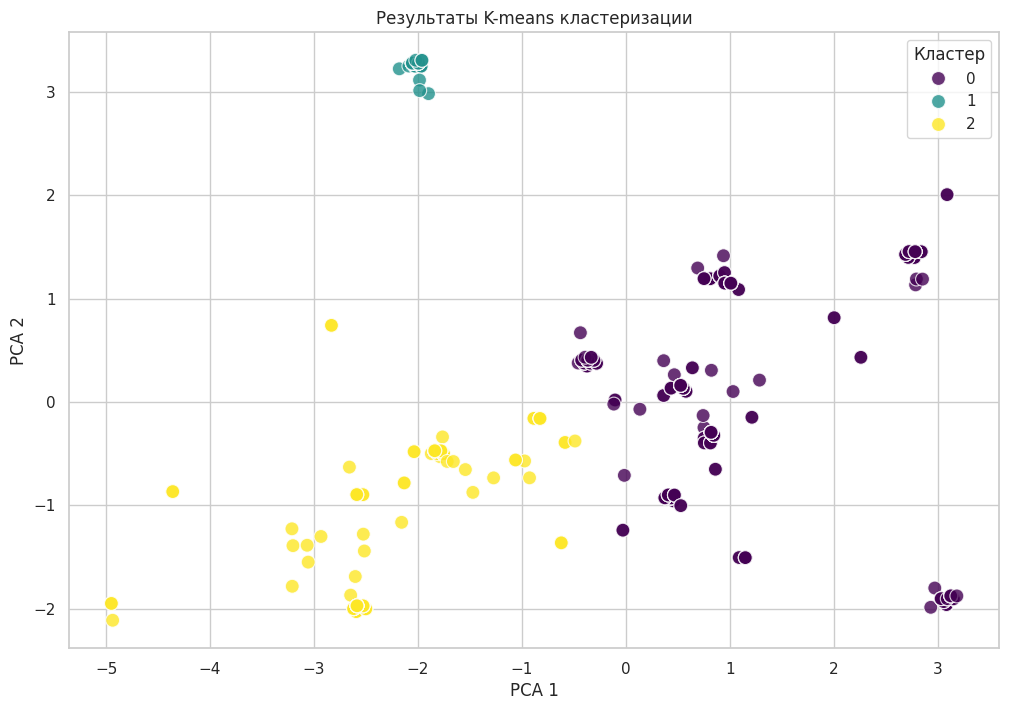

In [55]:
# обучаем K-Means, k = 3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)        #n-кол во кластеров, n_init - K-Means несколько раз запускается с разными начальными центрами (10 раз)                                                            и выбирает лучший результат (где сумма расстояний до центров минимальна).
clusters = kmeans.fit_predict(df_scaled)                         #и выбирает лучший результат то есть где сумма расстояний до центров минимальна.

# записываем резальт
df_not_processed['cluster'] = clusters
#df_not_processed

# метрики
silhouette = silhouette_score(df_scaled, clusters)
dbi = davies_bouldin_score(df_scaled, clusters)
calinski = calinski_harabasz_score(df_scaled, clusters)
print(f"Silhouette: {silhouette:.3f}")
print(f"Davies-Bouldin Index: {dbi:.3f}")
print(f"Calinski-Harabasz: {calinski:.3f}\n")


# средние значения числ призпо каждому кластеру
numeric_cols = df_not_processed.select_dtypes(include=['number']).columns
print(df_not_processed['cluster'].value_counts())
print(df_not_processed.groupby('cluster')[numeric_cols].mean())
print("\n")

#график
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

plt.figure(figsize=(12, 8))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=clusters, palette='viridis', s=100, alpha=0.8)
plt.title('Результаты K-means кластеризации')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Кластер')
plt.grid(True)
plt.show()


# Вывод (k=3)

**Кластер 0 (240 чел)** - самая большая группа подопытных с хорошим снорм, средней активностью и низким стрессом. aka нормальная стабильная группа

Возраст: ~43

Сон: ~7.60 ч, качество сна ~8.05

Активность: ~63, шаги ~6945

Стресс: ~4.28

Пульс: ~68

-----------------------------------------------------------

**Кластер 2 (102 чел)** - средняя группа с плохим качеством сна, высоким стрессом и низкой физической активностью. Люди в этой группе моложе чем в кластере 0.

Возраст: ~37.8

Сон: ~6.35 ч, качество сна ~6.0

Активность: ~40.4, шаги ~5517

Стресс: ~7.17

Пульс: ~73.78

---------------------------------------------------------

Кластер 1 (32 чел.) - самая маленькая группа, с высокой активностью, с самым коротким сном и с самым высоким уровнем стресса.

Возраст: ~49.75

Сон: ~6.07 ч, качество сна ~6.0

Активность: ~90, шаги ~10000

Стресс: ~8.0

Пульс: ~75


----------------------------------------------------

**Метрики:**
Silhouette = 0.371 — кластеры в целом различимы, но есть пересечения, то есть разделение не идеальное.

Davies–Bouldin = 1.035 — средний уровень “смешивания” кластеров. ()

Calinski–Harabasz = 135.224 — разбиение имеет структуру, но без сверхчёткой границы.



**c k=4**

Silhouette: 0.414
Davies-Bouldin Index: 1.076
Calinski-Harabasz: 159.480

cluster
2    173
1    100
0     69
3     32
Name: count, dtype: int64
               Age  Sleep Duration  Quality of Sleep  Physical Activity Level  \
cluster                                                                         
0        55.275362        8.250725          9.000000                54.855072   
1        37.770000        6.340000          5.980000                40.150000   
2        38.115607        7.341040          7.653179                66.184971   
3        49.750000        6.065625          6.000000                90.000000   

         Stress Level  Heart Rate   Daily Steps  cluster  
cluster                                                   
0            3.028986   67.159420   6005.797101      0.0  
1            7.190000   73.820000   5507.000000      1.0  
2            4.797688   68.358382   7308.670520      2.0  
3            8.000000   75.000000  10000.000000      3.0  




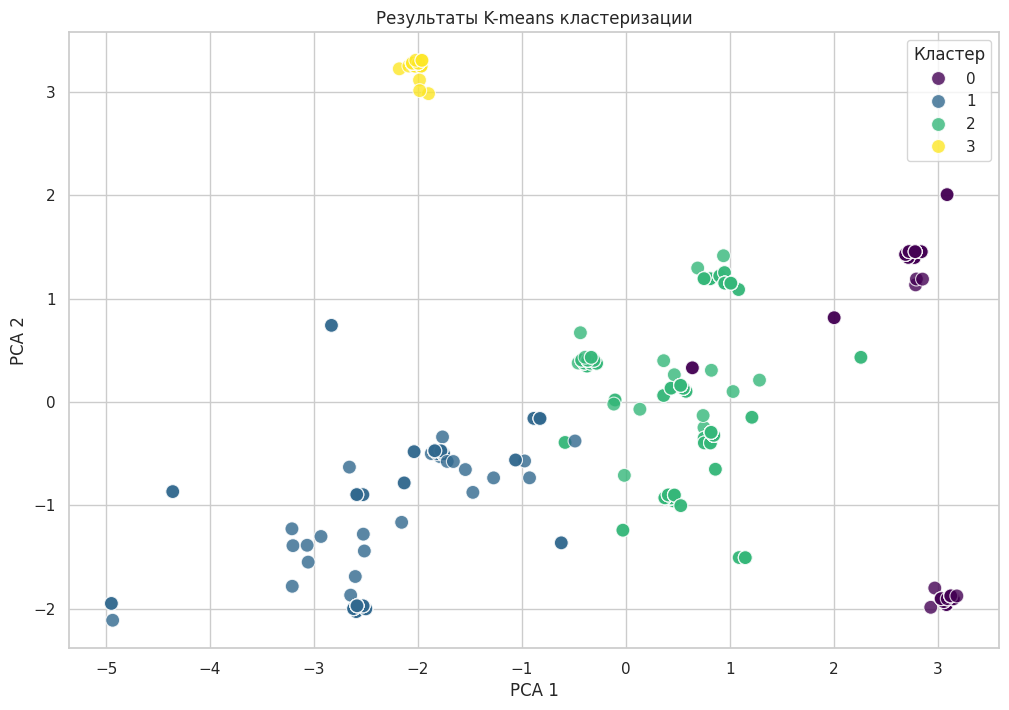

In [56]:
# обучаем K-Means, k = 4
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)        #n-кол во кластеров, n_init - K-Means несколько раз запускается с разными начальными центрами (10 раз)                                                            и выбирает лучший результат (где сумма расстояний до центров минимальна).
clusters = kmeans.fit_predict(df_scaled)                         #и выбирает лучший результат то есть где сумма расстояний до центров минимальна.

#записываем резалт
df_not_processed['cluster'] = clusters
#df_not_processed

#метрики
silhouette = silhouette_score(df_scaled, clusters)
dbi = davies_bouldin_score(df_scaled, clusters)
calinski = calinski_harabasz_score(df_scaled, clusters)

print(f"Silhouette: {silhouette:.3f}")
print(f"Davies-Bouldin Index: {dbi:.3f}")
print(f"Calinski-Harabasz: {calinski:.3f}\n")


# средние значения числ приз по каждому кластеру
numeric_cols = df_not_processed.select_dtypes(include=['number']).columns
print(df_not_processed['cluster'].value_counts())
print(df_not_processed.groupby('cluster')[numeric_cols].mean())
print("\n")
# выводим график
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

plt.figure(figsize=(12, 8))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=clusters, palette='viridis', s=100, alpha=0.8)
plt.title('Результаты K-means кластеризации')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Кластер')
plt.grid(True)
plt.show()


# Вывод (k=4)

**Кластер 2 (173 чел)** - самая большая группа. Сон ближе к норме, качество сна на высоком уровне, активность умеренная, стресс средний.

Возраст: ~38.12

Сон: ~7.34 ч, качество сна ~7.65

Активность: ~66.18, шаги ~7308.67

Стресс: ~4.80

Пульс: ~68.36

----------------------------------------------------
**Кластер 1 (100 чел)** - группа с самым плохим качеством сна и высоким стрессом + низкая физическая активность

Возраст: ~37.77

Сон: ~6.34 ч, качество сна ~5.98

Активность: ~40.15, шаги ~5507.00

Стресс: ~7.19

Пульс: ~73.82

---------------------------------------------------------
**Кластер 0 (69 чел**) - самая здоровая по сну группа: самый длинный сон и максимальное качество сна, при этом низкий стресс и низкий пулс.

Возраст: ~55.28

Сон: ~8.25 ч, качество сна ~9.00

Активность: ~54.86, шаги ~6005.80

Стресс: ~3.03

Пульс: ~67.16

---------------------------------------------------
**Кластер 3 (32 чел)** - самая жесткая группа: очень высокая активность и максимум шагов но при этом самый высокий стресс и короткий сон.

Возраст: ~49.75

Сон: ~6.07 ч, качество сна ~6.00

Активность: ~90.00, шаги ~10000.00

Стресс: ~8.00

Пульс: ~75.00

---------------------------------------------------
Метрики:
Silhouette = 0.414 - кластеры различимы лучше, чем при k=3: разделение стало более чётким, хотя пересечения всё ещё возможны. (метрика оценивает, насколько объект похож на свой собственный кластер по сравнению с другими.)

Davies–Bouldin = 1.076 — уровень смешивания кластеров примерно средний; по сравнению с k=3 чуть хуже (значение стало больше), то есть некоторые кластеры могут быть близки друг к другу. (сравнивает насколько кластеры "разбросаны")

Calinski–Harabasz = 159.480 — структура разбиения стала выраженнее, чем при k=3 (значение выше), значит в целом k=4 описывает данные лучше по этой метрике. ()

k=2:  Inertia = 2535.31,  Silhouette = 0.314
k=3:  Inertia = 2055.66,  Silhouette = 0.371
k=4:  Inertia = 1549.96,  Silhouette = 0.414
k=5:  Inertia = 1307.75,  Silhouette = 0.430
k=6:  Inertia = 1083.17,  Silhouette = 0.486
k=7:  Inertia = 918.28,  Silhouette = 0.523
k=8:  Inertia = 787.99,  Silhouette = 0.538
k=9:  Inertia = 665.90,  Silhouette = 0.565
k=10:  Inertia = 563.90,  Silhouette = 0.606


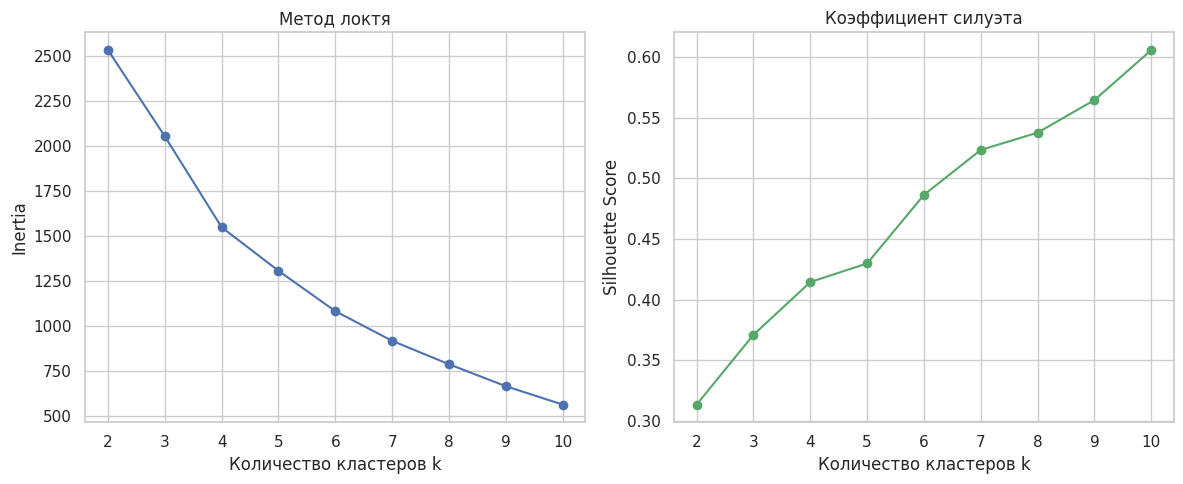

In [61]:
inertias = []           #сюда скидываем inertia для каждого k
silhouettes = []        #сюда скидываем silhousetes_score для кажого k
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertias.append(kmeans.inertia_)  # Вутренняя метрика K-Means
    silhouettes.append(silhouette_score(df_scaled, kmeans.labels_))  # Внешняя метрика

for k, inertia, silhouette in zip(K, inertias, silhouettes):
    print(f"k={k}:  Inertia = {inertia:.2f},  Silhouette = {silhouette:.3f}")

# Визуализация "метода локтя"
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(K, inertias, 'bo-')
plt.xlabel('Количество кластеров k')
plt.ylabel('Inertia')
plt.title('Метод локтя')

plt.subplot(1,2,2)
plt.plot(K, silhouettes, 'go-')
plt.xlabel('Количество кластеров k')
plt.ylabel('Silhouette Score')
plt.title('Коэффициент силуэта')
plt.tight_layout()
plt.show()

** МЕТОД ЛОКТЯ ВЫВОД**

Мы видим, что до k=4 резкое падение то есть улучшение очень сильное, после 4-5 падение становится гораздо менее резким и равномерным.

**Silhouette**:
k4 даёт силуэт 0.414, что обьективно лучше, чем k3, и при этом количество кластеров адекватное.

------------------------------------------------
**На** мой взгляд лучшим компромисом тут является 4.


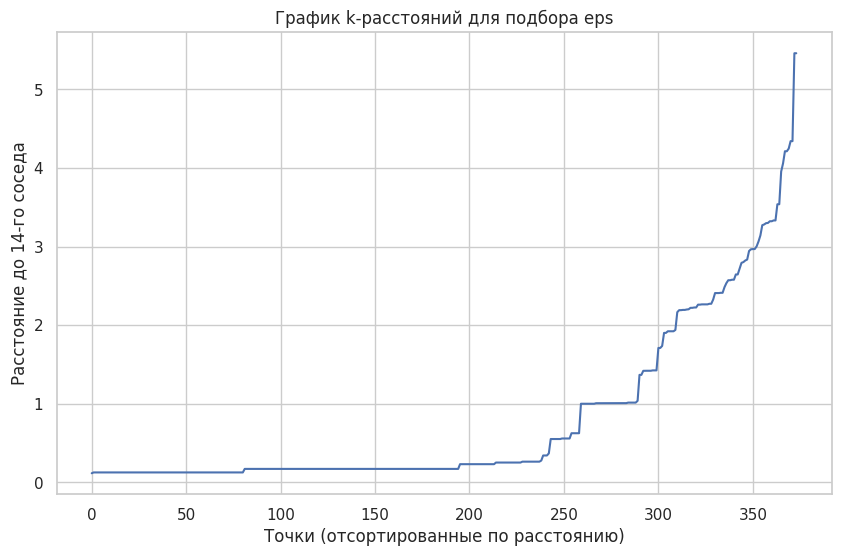

In [63]:

min_samples = 15
neighbors = NearestNeighbors(n_neighbors=min_samples)              #для каждой точки ищем 15 ближайший соседей и расстоянгие до них
neighbors_fit = neighbors.fit(df_scaled)
distances, indices = neighbors_fit.kneighbors(df_scaled)

# Сортируем расстояния и строим график
sorted_distances = np.sort(distances[:, min_samples-1])

plt.figure(figsize=(10, 6))
plt.plot(sorted_distances)
plt.title('График k-расстояний для подбора eps')
plt.xlabel('Точки (отсортированные по расстоянию)')
plt.ylabel(f'Расстояние до {min_samples-1}-го соседа')
plt.grid(True)
plt.show()


# Вывод по графику k расстояний:
По началу график идет идет плавно и почти горизонтально, а потом мы видим резкий "прыжок". Это и есть оптимальный eps для DBSCAN (2.1)/
До этого значения плотные области данных, после разреженные точки и выбросы.

dbscan_cluster
 2    96
-1    59
 3    38
 7    33
 0    32
 6    32
 5    32
 4    27
 1    25
Name: count, dtype: int64


                      Age  Sleep Duration  Quality of Sleep  \
dbscan_cluster                                                
-1              36.525424        6.833898          6.661017   
 0              30.500000        7.737500          7.000000   
 1              32.320000        6.060000          6.000000   
 2              38.947917        7.415625          8.000000   
 3              44.868421        6.428947          6.157895   
 4              44.370370        6.596296          7.000000   
 5              49.750000        6.065625          6.000000   
 6              52.781250        8.425000          9.000000   
 7              58.030303        8.093939          9.000000   

                Physical Activity Level  Stress Level  Heart Rate  \
dbscan_cluster                                                      
-1                            50.593220     

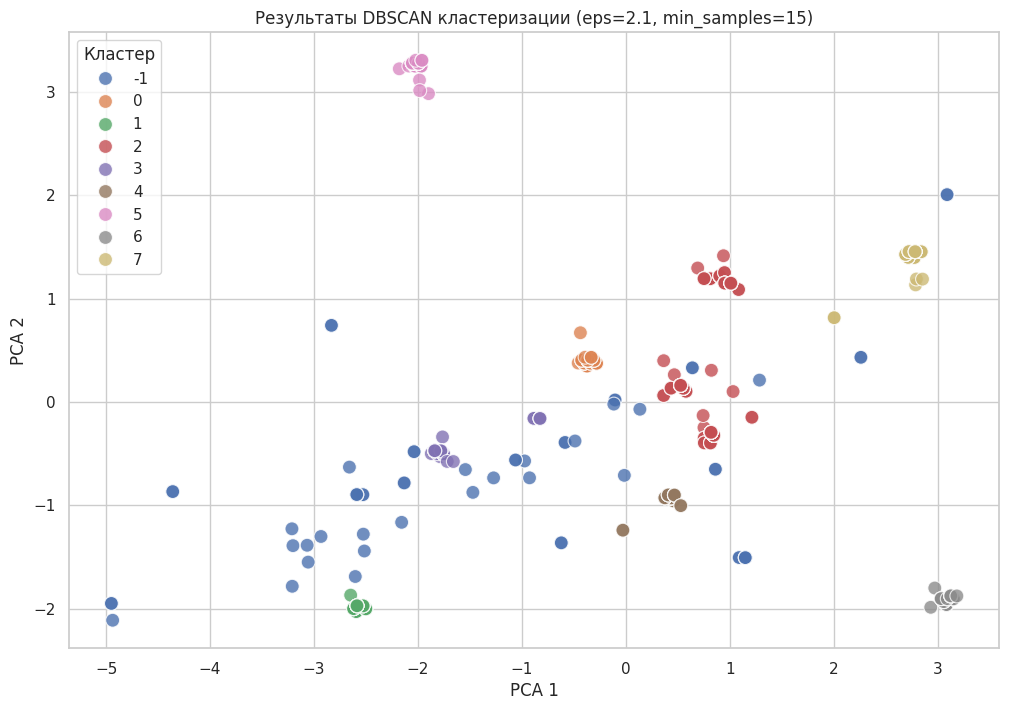

In [70]:
# Инициализируем и обучаем модель
eps = 2.1
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(df_scaled)
df_not_processed['dbscan_cluster'] = clusters

# Средние значения по каждому кластеру
numeric_cols = df_not_processed.select_dtypes(include=['number']).columns
print(df_not_processed['dbscan_cluster'].value_counts())
print("\n")
print(df_not_processed.groupby('dbscan_cluster')[numeric_cols].mean())

n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)        #кол-во настоящих кластеров без шума

if n_clusters > 1:
    mask = clusters != -1
    silhouette = silhouette_score(df_scaled[mask], clusters[mask])
    dbi = davies_bouldin_score(df_scaled[mask], clusters[mask])
    calinski = calinski_harabasz_score(df_scaled[mask], clusters[mask])
    print(f"\n\nSilhouette Score (без учета шума): {silhouette:.3f}")
    print(f"Davies-Bouldin Index: {dbi:.3f}")
    print(f"Calinski-Harabasz: {calinski:.3f}")
else:
    print("\nSilhouette Score не может быть рассчитан, так как найден 1 кластер или меньше.")

# Используем тот же PCA, что и для K-means, для сопоставимости
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

plt.figure(figsize=(12, 8))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=clusters, palette='deep', s=100, alpha=0.8)
plt.title(f'Результаты DBSCAN кластеризации (eps={eps}, min_samples={min_samples})')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Кластер')
plt.grid(True)
plt.show()

# Вывод:
DBSCAN  при eps 2.1 и main_samples сделал 7 более плотных, "специфичных" кластера:

Кластер 2 (96 чел) - самая большая группа: хороший сон (достаточно длинный) и высокое качество сна, активность высокая, стресс относительно низкий.

Возраст: ~38.95

Сон: ~7.42 ч, качество сна ~8.00

Активность: ~70.68, шаги ~7633.33

Стресс: ~4.63

Пульс: ~68.72

Кластер 3 (38 чел) - группа со сниженным качеством сна и повышенным стрессом при средней активности. Сон короче, качество хуже, стресс заметно выше.
Возраст: ~44.87

Сон: ~6.43 ч, качество сна ~6.16

Активность: ~45.00, шаги ~6000.00

Стресс: ~7.00

Пульс: ~72.00

Кластер 7 (33 чел) - группа с очень хорошим сном  и низким стрессом, активность высокая.

Возраст: ~58.03

Сон: ~8.09 ч, качество сна ~9.00

Активность: ~75.00, шаги ~6878.79

Стресс: ~3.06

Пульс: ~68.24

Кластер 0 (32 чел) - активная группа со стабильным сном и средним стрессом. По активности и шагам, одна из самых “спортивных”, при этом сон неплохой, но стресс чуть выше, чем в лучших кластерах.

Возраст: ~30.50

Сон: ~7.70 ч, качество сна ~7.00

Активность: ~75.00, шаги ~8000.00

Стресс: ~6.00

Пульс: ~70.00

Кластер 6 (32 чел) - восстановление и режим сна на максимуме: самый длинный сон и топовое качество сна, при этом низкий стресс и спокойный пульс, но физическая активность низкая .

Возраст: ~52.78

Сон: ~8.43 ч, качество сна ~9.00

Активность: ~30.00, шаги ~5600.00

Стресс: ~3.00

Пульс: ~65.00

Кластер 5 (32 чел) - очень высокая активность и максимум шагов, но при этом высокий стресс и короткий сон со средним качеством. Напоминает переработку: физически активны, но восстановление страдает.

Возраст: ~49.75

Сон: ~6.07 ч, качество сна ~6.00

Активность: ~90.00, шаги ~10000.00

Стресс: ~8.00

Пульс: ~75.00

Кластер 4 (27 чел) - группа со средним/хорошим сном и самым низким стрессом , но активность ниже средней. Похоже на спокойный образ жизни.

Возраст: ~44.37

Сон: ~6.60 ч, качество сна ~7.00

Активность: ~43.89, шаги ~6000.00

Стресс: ~4.15

Пульс: ~65.00

Кластер 1 (25 чел) - самая проблемная группа: низкая активность, короткий сон, среднее/низкое качество сна и очень высокий стресс.

Возраст: ~32.32

Сон: ~6.00 ч, качество сна ~6.00

Активность: ~30.00, шаги ~5000.00

Стресс: ~8.00

Пульс: ~72.00



# МЕТРИКИ:

Silhouette Score = 0.704 - то есть - то есть кластеры плотные и хорошо отделены.

DBSCAN как раз и оставляет только плотные группы, а всё сомнительное выкидывает в шум — это обычно поднимает силуэт.

Davies–Bouldin Index = 0.515 - смешивание кластеров низкое.

Calinski–Harabasz = 430.936 - между кластерами расстояния большие, внутри кластеров разброс маленький, структура разбиения выраженная.